IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

DATASET

In [2]:
df = pd.read_csv('obat200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


DATA UNDERSTANDING

In [3]:
print("data shape:", df.shape)

print(" ")

print("data info:")
df.info()

print(" ")

print("data description:")
df.describe()

data shape: (200, 6)
 
data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
 
data description:


,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [4]:
df.Drug.value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

VISUALISASI

<Axes: xlabel='Age', ylabel='Count'>

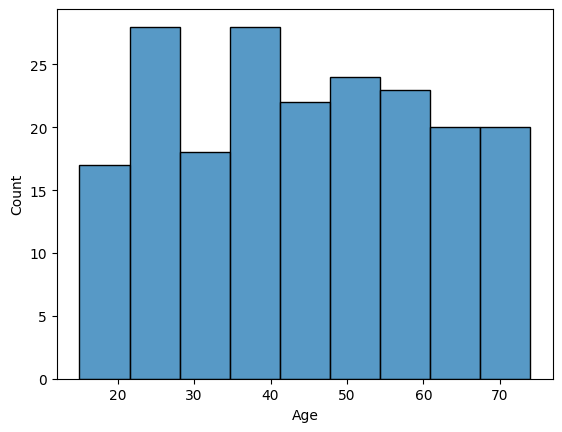

In [5]:
sns.histplot(df['Age'])

CLEANING DATA

In [6]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

EDA

C:\Users\ryhnd\AppData\Local\Temp\ipykernel_20260\2838397686.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Drug', data=df, palette='flare')


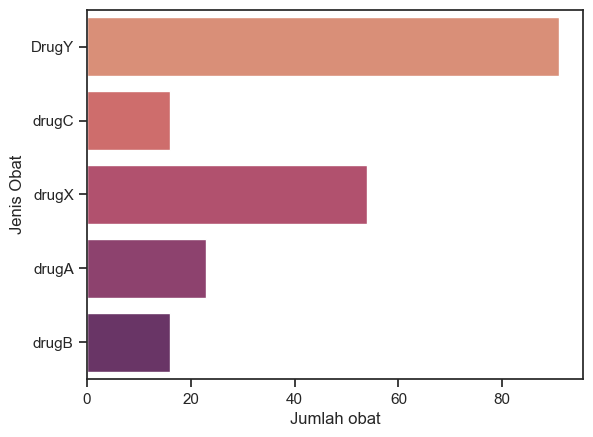

In [8]:
sns.set_theme(style="ticks")
sns.countplot(y='Drug', data=df, palette='flare')
plt.ylabel('Jenis Obat')
plt.xlabel('Jumlah obat')
plt.show()

C:\Users\ryhnd\AppData\Local\Temp\ipykernel_20260\2232821571.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='rocket')


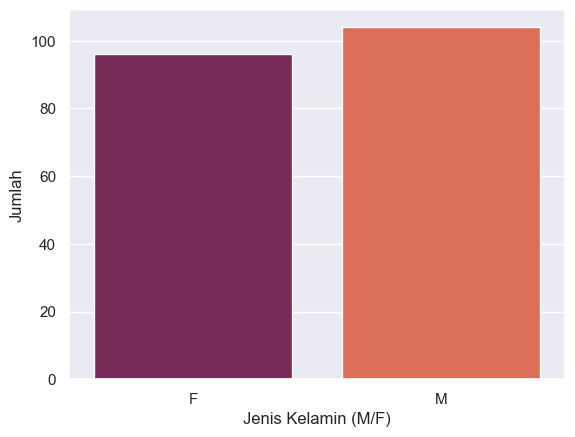

In [9]:
sns.set_theme(style="darkgrid")
sns.countplot(x='Sex', data=df, palette='rocket')
plt.ylabel('Jumlah')
plt.xlabel('Jenis Kelamin (M/F)')
plt.show()

DATA PREPARATION

In [10]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [11]:
# DATA PREPARATION
from sklearn.preprocessing import LabelEncoder

lblEncoder = LabelEncoder()

df['Sex'] = lblEncoder.fit_transform(df['Sex'])
df['BP'] = lblEncoder.fit_transform(df['BP'])
df['Cholesterol'] = lblEncoder.fit_transform(df['Cholesterol'])
df['Drug'] = lblEncoder.fit_transform(df['Drug'])

In [12]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [13]:
# splitting data
x = df.drop(columns='Drug')
y = df['Drug']

print("x: ", x.shape)
print("y: ", y.shape)

x:  (200, 5)
y:  (200,)


In [14]:
# bagi data testing dan data training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
print(f"x_train: {x_train.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

x_train: (160, 5)
x_test: (40, 5)
y_train: (160,)
y_test: (40,)


MODELLING

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

y_predict = knn.predict(x_test)
knn_acc = accuracy_score(y_test, y_predict)
print(classification_report(y_test, y_predict))
print("akurasi model KNN: {:.2f}%".format (knn_acc*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.56      0.83      0.67         6
           2       0.50      0.67      0.57         3
           3       1.00      0.20      0.33         5
           4       0.73      0.73      0.73        11

    accuracy                           0.78        40
   macro avg       0.76      0.69      0.66        40
weighted avg       0.82      0.78      0.76        40

akurasi model KNN: 77.50%


In [22]:
testing = {
    'Age': [26],
    'Sex': ['M'],
    'BP': ['HIGH'],
    'Cholesterol': ['NORMAL'],
    'Na_to_K': [3.5]
}

testing = pd.DataFrame(testing)
testing

,Age,Sex,BP,Cholesterol,Na_to_K
0,26,M,HIGH,NORMAL,3.5


In [23]:
# Apply the same label encoding to the testing data
testing['Sex'] = lblEncoder.fit_transform(testing['Sex'])
testing['BP'] = lblEncoder.fit_transform(testing['BP'])
testing['Cholesterol'] = lblEncoder.fit_transform(testing['Cholesterol'])


pred_coba = knn.predict(testing)
print("hasil prediksi pasien baru")
print(pred_coba)

hasil prediksi pasien baru
[1]
